<a href="https://colab.research.google.com/github/leekate/2020ctrc/blob/master/0807_renewal_first_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTI_IMAGE_CLASSIFICATION**

4가지의 이미지 분류

기본적인 방법은 단일 이미지 분류와 같다. 대신, 다중 이미지 분류이기 때문에 카테고리의 변화가 있다.


## 1번 train

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 파일 읽어오기

In [ ]:
'''!pip uninstall keras
!pip install Keras==2.2.4

!pip uninstall tensorflow
!pip install tensorflow==1.13.1'''

'!pip uninstall keras\n!pip install Keras==2.2.4\n\n!pip uninstall tensorflow\n!pip install tensorflow==1.13.1'

In [ ]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = '/content/drive/My Drive/CTRC/train'
categories = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []


#카테고리별로 돌면서 label 먼저 0으로 초기화
#첫번째 idx에 1 넣어주기
#1 0 0 0 이면 cancer
#0 1 0 0 이면 precancer 이런식


for idx, cat in enumerate(categories): #cat은 뭘까 
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat #cat은 뭘까
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB") #이미지 RGB값으로 바꿔주고
        img = img.resize((image_w, image_h)) #resize하고
        data = np.asarray(img) #그 값을 numpy 라이브러리를 이용해 저장

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

xy = (X_train, X_test, y_train, y_test)
np.save('/content/drive/My Drive/CTRC/train/multi_image_data.npy', xy)

print("ok", len(y))


1. Cancer  파일 길이 :  412
1. Cancer  :  /content/drive/My Drive/CTRC/train/1. Cancer/can_1.jpg
2. Precancer  파일 길이 :  150
2. Precancer  :  /content/drive/My Drive/CTRC/train/2. Precancer/precan_1.jpg
3. Extra  파일 길이 :  265
3. Extra  :  /content/drive/My Drive/CTRC/train/3. Extra/inf_1.jpg


KeyboardInterrupt: ignored

In [ ]:

from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['1. Cancer', '2. Precancer','3. Extra','4. Normal']

imgs = trainGen.next()
arr = imgs[0][0]


img = array_to_img(arr).resize((128, 128))

### 학습하기

이제 numpy 데이터를 불러온다. 이거 가지고 학습!

In [ ]:
import os, glob, numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K


import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('/content/drive/My Drive/CTRC/train/multi_image_data.npy', allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(1386, 64, 64, 3)
1386


In [ ]:
categories = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

### CNN 모델 만들기 (Conv2D 이용)

In [ ]:


with K.tf.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (7,7), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    '''model.add(Dropout(0.25))'''
    # 3X3 크기의 컨볼루션 레이어를 32개의 필터수를 처음에 생성
    # 활성화 함수 relu
    # (64,64,3)의 튜플 값 가진다
    # Maxpooling2D를 통해 중요 값만 뽑아 작은 출력값 만든다

    
    model.add(Conv2D(64, (5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    '''model.add(Dropout(0.25))'''

    model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(512, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Flatten()) 
    #CNN에서 컨볼루션 레이어나 맥스풀링을 거치면 주요 특징만 추출되어 학습됨
    
    #컨볼루션이나 맥스풀링은 주로 2차원을 다루지만
    #전결합층에 전달을 하기 위해서는 1차원으로 바꿔야하는데
    #이 때 Flatten사용
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)
    
    

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)         295168    
__________

In [ ]:
history = model.fit(X_train, y_train, batch_size=16, epochs=40, 
                    validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Train on 1386 samples, validate on 594 samples
Epoch 1/40
1386/1386 [==============================] - 58s 42ms/step - loss: 1.2011 - acc: 0.5541 - val_loss: 1.0626 - val_acc: 0.5993

Epoch 00001: val_loss improved from inf to 1.06262, saving model to ./model/multi_img_classification.model
Epoch 2/40
1386/1386 [==============================] - 57s 41ms/step - loss: 1.1136 - acc: 0.5758 - val_loss: 0.9919 - val_acc: 0.6263

Epoch 00002: val_loss improved from 1.06262 to 0.99189, saving model to ./model/multi_img_classification.model
Epoch 3/40
1386/1386 [==============================] - 56s 40ms/step - loss: 1.1719 - acc: 0.5620 - val_loss: 1.0964 - val_acc: 0.5993

Epoch 00003: val_loss did not improve from 0.99189
Epoch 4/40
1386/1386 [==============================] - 56s 40ms/step - loss: 1.0803 - acc: 0.5750 - val_loss: 0.9849 - val_acc: 0.5993

Epoch 00004: val_loss improved from 0.99189 to 0.98494, saving model to ./model/multi_img_classification.model
Epoch 5/40
1386/1386 [===

In [ ]:
print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))

594/594 [==============================] - 7s 12ms/step
정확도 : 0.70 


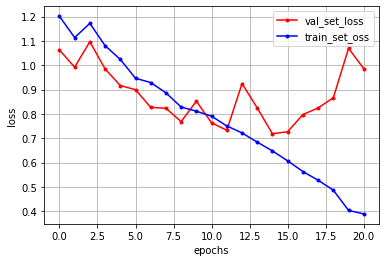

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

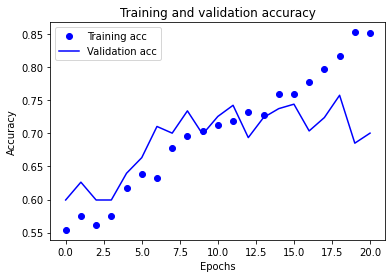

In [ ]:
plt.clf() # 그래프를 초기화합니다.
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(x_len, acc, 'bo', label='Training acc')
plt.plot(x_len, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/My Drive/CTRC/train/multi_img_data/imgs_others_test"
image_w = 128
image_h = 128

pixels = image_h * image_w * 3


In [ ]:
X = []
'''filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)         
    img = img.convert("RGB")
    img = img.resize((128,128))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)'''

X = np.array(X)
X = X.reshape(X.shape[0], 64,64,3)
model = load_model( './model/multi_img_classification.model')

f는 이미지가 있는 데이터 경로를 뜻합니다. 

위에서 files = glob.glob(caltech_dir+"/*.*")

에서 가져오는 데이터를 (이미지 데이터들이 files라는 리스트 변수에 들어갑니다.)

open해주는 것이죠.

 

즉, files = glob.glob(caltech_dir+"/*.*") 의 경로는 지우님께서 사용하고 있는 local 환경에서

image가 있는 경로로 맞춰주시면 됩니다.

*github host 이수진

## 2번 모델 예측하기

In [ ]:
'''#이 파일의 예측

img=np.resize(img,(1,64,64,3))
predictions_single = model.predict(img)

print(predictions_single)'''

'#이 파일의 예측\n\nimg=np.resize(img,(1,64,64,3))\npredictions_single = model.predict(img)\n\nprint(predictions_single)'

In [ ]:
#훈련된 모델을 이용해 한 이미지에 대한 예측 만들기

# 테스트 세트에서 이미지 하나를 선택합니다
img=np.resize(img,(1,64,64,3))
img = X_test[0]

print(img.shape)


(64, 64, 3)


### 파일 비교해서 결과내기 

In [ ]:
#해당 이미지 predict
prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0


print(X.shape)

(0, 64, 64, 3)


In [ ]:
print(img)

[[[0.702 0.333 0.204]
  [0.702 0.329 0.212]
  [0.710 0.333 0.216]
  ...
  [0.976 0.522 0.286]
  [1.000 0.565 0.322]
  [0.996 0.584 0.341]]

 [[0.710 0.337 0.208]
  [0.706 0.333 0.216]
  [0.710 0.337 0.220]
  ...
  [0.973 0.522 0.286]
  [1.000 0.565 0.318]
  [1.000 0.592 0.345]]

 [[0.710 0.337 0.204]
  [0.710 0.337 0.212]
  [0.706 0.341 0.220]
  ...
  [0.980 0.522 0.286]
  [1.000 0.557 0.306]
  [1.000 0.584 0.322]]

 ...

 [[0.996 0.706 0.412]
  [1.000 0.698 0.408]
  [1.000 0.702 0.412]
  ...
  [1.000 0.651 0.357]
  [1.000 0.639 0.349]
  [1.000 0.624 0.329]]

 [[0.996 0.682 0.396]
  [1.000 0.678 0.392]
  [1.000 0.686 0.404]
  ...
  [0.996 0.635 0.341]
  [0.996 0.631 0.337]
  [1.000 0.624 0.329]]

 [[0.996 0.675 0.388]
  [1.000 0.678 0.396]
  [0.996 0.682 0.408]
  ...
  [0.996 0.635 0.349]
  [1.000 0.635 0.345]
  [1.000 0.620 0.329]]]


In [ ]:

from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['1. Cancer', '2. Precancer','3. Extra','4. Normal']

imgs = trainGen.next()
arr = imgs[0][0]


img = array_to_img(arr).resize((128, 128))

[3]
예측: 4. Normal
Label:[0 0 0 1]


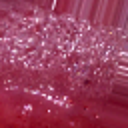

In [ ]:

result = model.predict_classes(arr.reshape(1,64,64,3))

print(result)
print('예측: {}'.format(cls_index[result[0]]))
print("Label:" + str(y_test[0]) )
img


# np.argmax: 다차원 배열의 경우에 차원에 따라 가장 큰 값의 인덱스들을 반환
# format: 문자열에 포함된 대괄호 개수 보다 format안에 들어 있는 값의 수가 적으면 에러

### 혼동 행렬 실패

In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)


for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=["1. Cancer","2. Precancer","3. Extra","4. Normal"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()'''

'import numpy as np\nimport matplotlib.pyplot as plt\n\nfrom sklearn import svm, datasets\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import plot_confusion_matrix\n\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nclassifier = svm.SVC(kernel=\'linear\', C=0.01).fit(X_train, y_train)\n\n\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, X_test, y_test,\n                                 display_labels=["1. Cancer","2. Precancer","3. Extra","4. Normal"],\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()'

In [ ]:
'''from sklearn.metrics import confusion_matrix

y_predicted = logit.predict(x_test)
cm = confusion_matrix(y_test, result)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(4):
    for j in range(4):
        plt.show()'''

'from sklearn.metrics import confusion_matrix\n\ny_predicted = logit.predict(x_test)\ncm = confusion_matrix(y_test, result)\n\nplt.clf()\nplt.imshow(cm, interpolation=\'nearest\', cmap=plt.cm.Wistia)\nclassNames = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]\nplt.title(\'Confusion Matrix - Test Data\')\nplt.ylabel(\'True label\')\nplt.xlabel(\'Predicted label\')\ntick_marks = np.arange(len(classNames))\nplt.xticks(tick_marks, classNames, rotation=45)\nplt.yticks(tick_marks, classNames)\n\nfor i in range(4):\n    for j in range(4):\n        plt.show()'

In [ ]:
'''print(plot_confusion_matrix(img))'''

'print(plot_confusion_matrix(img))'

In [ ]:
'''print(y_test)'''

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]


In [ ]:
'''import seaborn as sns
import matplotlib.pyplot as plt     


cm = confusion_matrix(result[0], y_test[0])

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
 #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["1. Cancer","2. Precancer","3. Extra","4. Normal"])
ax.yaxis.set_ticklabels(["1. Cancer","2. Precancer","3. Extra","4. Normal"])'''

'import seaborn as sns\nimport matplotlib.pyplot as plt     \n\n\ncm = confusion_matrix(result[0], y_test[0])\n\nax= plt.subplot()\nsns.heatmap(cm, annot=True, ax = ax)\n #annot=True to annotate cells\n\n# labels, title and ticks\nax.set_xlabel(\'Predicted labels\')\nax.set_ylabel(\'True labels\')\nax.set_title(\'Confusion Matrix\')\nax.xaxis.set_ticklabels(["1. Cancer","2. Precancer","3. Extra","4. Normal"])\nax.yaxis.set_ticklabels(["1. Cancer","2. Precancer","3. Extra","4. Normal"])'

In [ ]:
'''#선배코드
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cls_pred):

    cls_true = data.valid.cls

    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    print(cm)

    plt.matshow(cm)

    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    

    plt.show()'''

In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
#%matplotlib inlinesns.set(font_scale=2)  #혼동행렬 폰트 크기! 1이면 너무 작다.

array= img
df_cm= pd.DataFrame(array,index = [ i for i in '1. Cancer,2. Precancer,3. Extra,4. Normal'],columns=[i for i in  "1. Cancer, 2. Precancer,3. Extra,4. Normal"])
plt.figure(figsize=(10,7))
#plt.tittle("confusion matrix")
sns.heatmap(df_cm,annot=True)


#array = img
cm= pd.DataFrame(array,index = [ "1. Cancer","2. Precancer","3. Extra","4. Normal"],  columns=["1. Cancer","2. Precancer","3. Extra","4. Normal"] )
plt.figure(figsize=(10, 7))
plt.title('confusion matrix without confusion')
conf_ma=sns.heatmap(cm, annot=True)

print(conf_ma)'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\nimport matplotlib.pyplot as plt \n#%matplotlib inlinesns.set(font_scale=2)  #혼동행렬 폰트 크기! 1이면 너무 작다.\n\narray= img\ndf_cm= pd.DataFrame(array,index = [ i for i in \'1. Cancer,2. Precancer,3. Extra,4. Normal\'],columns=[i for i in  "1. Cancer, 2. Precancer,3. Extra,4. Normal"])\nplt.figure(figsize=(10,7))\n#plt.tittle("confusion matrix")\nsns.heatmap(df_cm,annot=True)\n\n\n#array = img\ncm= pd.DataFrame(array,index = [ "1. Cancer","2. Precancer","3. Extra","4. Normal"],  columns=["1. Cancer","2. Precancer","3. Extra","4. Normal"] )\nplt.figure(figsize=(10, 7))\nplt.title(\'confusion matrix without confusion\')\nconf_ma=sns.heatmap(cm, annot=True)\n\nprint(conf_ma)'

In [ ]:

!pip install hmmlearn==0.1.1

Processing /root/.cache/pip/wheels/56/ab/ad/6356405fc02d541c101b7d723ebfaf94b33f7dbad4e0154e7f/hmmlearn-0.1.1-cp36-cp36m-linux_x86_64.whl


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state= 0)
logit.fit(X_train, y_train)

y_predicted = logit.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['1. Cancer,2. Precancer,3. Extra,4. Normal']
plt.title(' Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = ['1. Cancer,2. Precancer,3. Extra,4. Normal', '1. Cancer,2. Precancer,3. Extra,4. Normal']
for i in range(4):
    for j in range(4):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

ValueError: ignored

### 혼동행렬 성공
